In [1]:
# plot results from 2D kinematic corner flow calculations
import numpy as np
import matplotlib.pyplot as plt
print(np.version.version)
!pwd

1.13.1
/Users/max/projects/fvmic2d/post_processing


In [2]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

In [3]:
%env PETSC_DIR /Users/max/sw/petsc-3.5.4
%env PETSC_ARCH arch-darwin-c-debug

env: PETSC_DIR=/Users/max/sw/petsc-3.5.4
env: PETSC_ARCH=arch-darwin-c-debug


In [4]:
import os
import sys
try:
    petsc_dir = os.environ['PETSC_DIR']
except KeyError:
    %env PETSC_DIR /opt/petsc-3.5
    petsc_dir = os.environ['PETSC_DIR']
try:
    petsc_arch = os.environ['PETSC_ARCH']
except KeyError:
    %env PETSC_ARCH arch-linux2-c-opt
    petsc_arch = os.environ['PETSC_ARCH']
sys.path.append(petsc_dir + '/bin/pythonscripts')

import PetscBinaryIO
def read_petscbin(filename):
    io=PetscBinaryIO.PetscBinaryIO()
    tmp=io.readBinaryFile(filename)
    vx = tmp[0].reshape((ny,nx))
    vy = tmp[1].reshape((ny,nx))
    coords = tmp[-1].reshape((ny,nx,2))
    xx = coords[:,:,0]
    yy = coords[:,:,1]
    T = tmp[8].reshape((ny,nx))
    P = tmp[2].reshape((ny,nx))
    xc = np.zeros((ny-1,nx-1))
    yc = np.zeros((ny-1,nx-1))
    for i in range(nx-1):
        for j in range(ny-1):
            xc[j,i] = 0.5*(xx[j,i] + xx[j,i+1])
            yc[j,i] = 0.5*(yy[j,i] + yy[j+1,i])
    return xx,yy,xc,yc,vx,vy,P,T


In [5]:
# load the output
import glob
output_dir='../jiaming_case47'

nx, ny = 264, 251

filelist = glob.glob(output_dir + '/loadNodal*.petscbin')
fnum = []
for i in filelist:
    tmp = int(i.split(('_'))[-1].split('.')[0])
    fnum.append( tmp )
order = np.argsort(fnum)
filelist1=[]
for i in order:
    filelist1.append(filelist[i])
filelist=filelist1

Tnorm = []
for file in filelist:
    xx,yy,xc,yc,vx,vy,P,T=read_petscbin(file)
    Tnorm.append(np.linalg.norm(T))


bag reader not implemented. exiting gracefully
bag reader not implemented. exiting gracefully
bag reader not implemented. exiting gracefully
bag reader not implemented. exiting gracefully
bag reader not implemented. exiting gracefully
bag reader not implemented. exiting gracefully
bag reader not implemented. exiting gracefully
bag reader not implemented. exiting gracefully
bag reader not implemented. exiting gracefully
bag reader not implemented. exiting gracefully
bag reader not implemented. exiting gracefully
bag reader not implemented. exiting gracefully
bag reader not implemented. exiting gracefully
bag reader not implemented. exiting gracefully
bag reader not implemented. exiting gracefully
bag reader not implemented. exiting gracefully
bag reader not implemented. exiting gracefully
bag reader not implemented. exiting gracefully
bag reader not implemented. exiting gracefully
bag reader not implemented. exiting gracefully
bag reader not implemented. exiting gracefully
bag reader no

bag reader not implemented. exiting gracefully
bag reader not implemented. exiting gracefully
bag reader not implemented. exiting gracefully
bag reader not implemented. exiting gracefully
bag reader not implemented. exiting gracefully
bag reader not implemented. exiting gracefully
bag reader not implemented. exiting gracefully
bag reader not implemented. exiting gracefully
bag reader not implemented. exiting gracefully


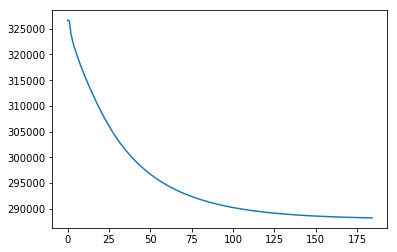

In [6]:
plt.figure()
plt.plot(Tnorm[0:-1])
plt.show()

In [10]:
xx,yy,xc,yc,vx,vy,P,T=read_petscbin(filelist[5])
# make interpolated data
from scipy.interpolate import griddata
x = np.linspace(xx.min(), xx.max(), 220)
y = np.linspace(yy.min(), yy.max(), 200)
px = xx.flatten()
py = yy.flatten()
xi, yi = np.meshgrid(x,y)
fx = vx.flatten()

gvx = griddata( (px,py), fx, (xi,yi),method='linear' )
gvy = griddata( (px,py), vy.flatten(), (xi,yi) )
gT = griddata(  (px,py), T.flatten(), (xi,yi) )
gP = griddata(  (px,py), P.flatten(), (xi, yi) )

bag reader not implemented. exiting gracefully


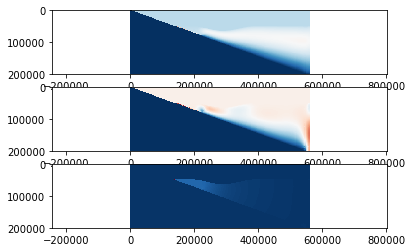

In [11]:
f, (ax1,ax2,ax3) =plt.subplots(3,1)
ax1.pcolormesh(xx,yy,vx,cmap='RdBu')
ax1.axis('equal')
ax1.invert_yaxis()
ax2.pcolormesh(xx,yy,vy,cmap='RdBu')
ax2.axis('equal')
ax2.invert_yaxis()
ax3.pcolormesh(xx,yy,P,cmap='RdBu')
ax3.axis('equal')
ax3.invert_yaxis()

plt.show()

In [12]:
vy.shape


(251, 264)

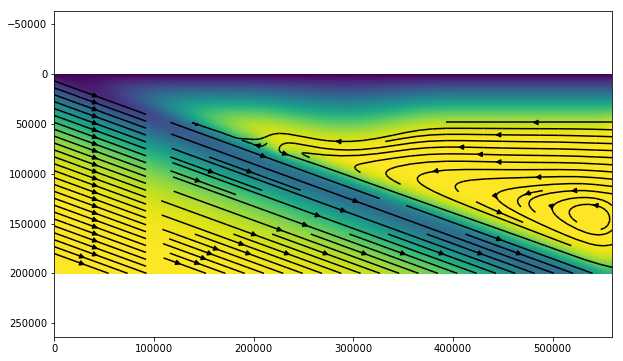

In [13]:
# plot the streamlines
f, ax = plt.subplots(1,1,figsize=(10,6))
#ax.tricontourf(xx.reshape((nx*ny,)),yy.reshape((nx*ny,)),T.reshape((nx*ny,)),vmin=0.0,vmax=1600.)
ax.pcolormesh(xi,yi,gT)
#ax.streamplot(xx,yy,vx,vy)

ax.streamplot(xi,yi,gvx,gvy,density=1.,color='k')
ax.invert_yaxis()
ax.axis('equal')
plt.show()

In [14]:
# load the melt table using .mat file
import scipy.io as sio
mat_contents = sio.loadmat('melt_table_0.1.mat')

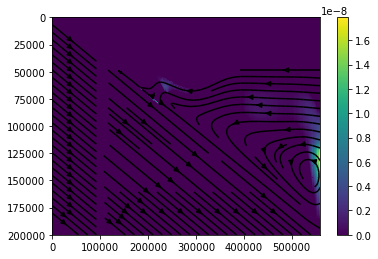

In [15]:
melt_p = mat_contents['melt_table']['P'][0][0]
melt_T = mat_contents['melt_table']['T'][0][0]
melt_f = mat_contents['melt_table']['F'][0][0]
melt_dfdp = mat_contents['melt_table']['dFdP'][0][0]
melt_dfdT = mat_contents['melt_table']['dFdT'][0][0]
# melt_f has rows correpsponding to different pressures, columns corresponding to different temperatures
import scipy.interpolate as interp
melt_fun = interp.RegularGridInterpolator((melt_p[:,0]*1.0e9,melt_T[0,:]),melt_f,method='linear',fill_value=0.0,bounds_error=False)
(dfdp1,dfdT1) = np.gradient(melt_f,melt_p[:,0],melt_T[0,:])
#dfdp_fun = interp.RegularGridInterpolator((melt_p[:,0],melt_T[0,:]),dfdp1,method='linear',fill_value=0.0,bounds_error=False)
dfdp_fun = interp.RegularGridInterpolator((melt_p[:,0]*1.0e9,melt_T[0,:]),melt_dfdp,method='linear',fill_value=0.0,bounds_error=False)
dfdT_fun = interp.RegularGridInterpolator((melt_p[:,0]*1.0e9,melt_T[0,:]),melt_dfdT,method='linear',fill_value=0.0,bounds_error=False)
newp = gP*3.0e19/1.0e21
newtotp = 3300.*10.*yi + newp
gf = melt_fun((newtotp,gT)) # gridded melt fraction
gdfdp = dfdp_fun((newtotp,gT))
gdfdT = dfdT_fun((newtotp,gT))
                                          
(dpdy, dpdx) = np.gradient(newtotp,yi[:,0],xi[0,:])
(dTdy, dTdx) = np.gradient(gT,yi[:,0],xi[0,:])

seconds_in_year = 3.15e7
dPdt = (dpdx*gvx + dpdy*gvy)*seconds_in_year
dTdt = (dTdx*gvx + dTdy*gvy)*seconds_in_year
melt_production = dPdt*gdfdp/1.0e9 + dTdt*gdfdT
melt_production[melt_production<0] = 0.0

xmask = x < 400000.
ymask = y < 150000.

fig,ax=plt.subplots(1,1)
h=plt.pcolormesh(xi,yi,melt_production)
ax.streamplot(xi,yi,gvx,gvy,density=1.,color='k')

ax.invert_yaxis()
plt.colorbar(h)
plt.show()

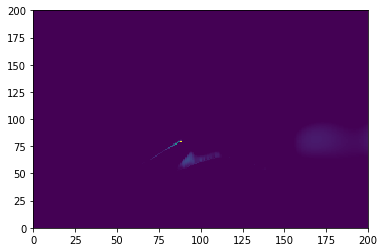

In [19]:
plt.figure()
plt.pcolormesh(melt_production[:,0:200])
plt.show()

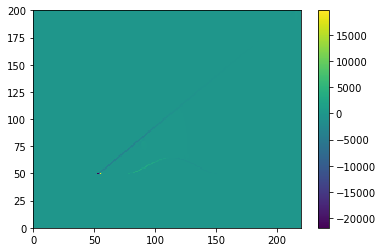

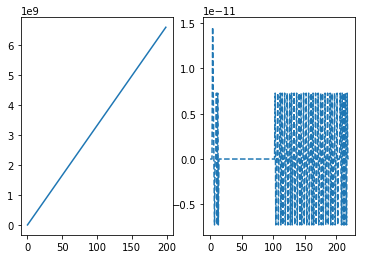

In [17]:
plt.figure()
h=plt.pcolor(dpdx)
plt.colorbar(h)
plt.show()
dpdx.min()

fig,(ax1,ax2) = plt.subplots(1,2)
ax1.plot(newtotp[:,10])
ax2.plot(dpdx[10,:],'--')
plt.show()


In [235]:
xi.shape

(200, 220)

print(np.isscalar(melt_T[0,:]))
print(melt_f.shape)
print(melt_T[0,:].shape)
(dfdp, dfdT) = np.gradient(melt_f,melt_p[:,0],melt_T[0,:],edge_order=2)


In [49]:
plt.figure()
h=plt.pcolor(melt_T[0,:],melt_p[:,0],dfdp)
plt.colorbar(h)
plt.show()

NameError: name 'dfdp' is not defined

In [52]:
melt_p

array([[  0.25      ,   0.25      ,   0.25      ,   0.25      ,
          0.25      ,   0.25      ,   0.25      ,   0.25      ,
          0.25      ,   0.25      ,   0.25      ,   0.25      ,
          0.25      ,   0.25      ,   0.25      ,   0.25      ,
          0.25      ,   0.25      ,   0.25      ,   0.25      ],
       [  0.50128205,   0.50128205,   0.50128205,   0.50128205,
          0.50128205,   0.50128205,   0.50128205,   0.50128205,
          0.50128205,   0.50128205,   0.50128205,   0.50128205,
          0.50128205,   0.50128205,   0.50128205,   0.50128205,
          0.50128205,   0.50128205,   0.50128205,   0.50128205],
       [  0.7525641 ,   0.7525641 ,   0.7525641 ,   0.7525641 ,
          0.7525641 ,   0.7525641 ,   0.7525641 ,   0.7525641 ,
          0.7525641 ,   0.7525641 ,   0.7525641 ,   0.7525641 ,
          0.7525641 ,   0.7525641 ,   0.7525641 ,   0.7525641 ,
          0.7525641 ,   0.7525641 ,   0.7525641 ,   0.7525641 ],
       [  1.00384615,   1.00384615,  

In [54]:
np.diff(melt_p[0,:])

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.])

In [55]:
melt_f.shape


(40, 20)

In [57]:
melt_p[:,1].shape

(40,)

In [13]:
x = np.linspace(0,1,20)
y = np.linspace(0,1,15)
(xx,yy) = np.meshgrid(x,y)
f = xx*yy
np.gradient(f)


[array([[ 0.        ,  0.0037594 ,  0.0075188 ,  0.0112782 ,  0.01503759,
          0.01879699,  0.02255639,  0.02631579,  0.03007519,  0.03383459,
          0.03759398,  0.04135338,  0.04511278,  0.04887218,  0.05263158,
          0.05639098,  0.06015038,  0.06390977,  0.06766917,  0.07142857],
        [ 0.        ,  0.0037594 ,  0.0075188 ,  0.0112782 ,  0.01503759,
          0.01879699,  0.02255639,  0.02631579,  0.03007519,  0.03383459,
          0.03759398,  0.04135338,  0.04511278,  0.04887218,  0.05263158,
          0.05639098,  0.06015038,  0.06390977,  0.06766917,  0.07142857],
        [ 0.        ,  0.0037594 ,  0.0075188 ,  0.0112782 ,  0.01503759,
          0.01879699,  0.02255639,  0.02631579,  0.03007519,  0.03383459,
          0.03759398,  0.04135338,  0.04511278,  0.04887218,  0.05263158,
          0.05639098,  0.06015038,  0.06390977,  0.06766917,  0.07142857],
        [ 0.        ,  0.0037594 ,  0.0075188 ,  0.0112782 ,  0.01503759,
          0.01879699,  0.02255639, 

In [12]:
dx = 2.
y = [1., 1.5, 3.5]
np.gradient(np.array([[1, 2, 6], [3, 4, 5]], dtype=np.float), dx, y)


[array([[ 1. ,  1. , -0.5],
        [ 1. ,  1. , -0.5]]), array([[ 2. ,  2. ,  2. ],
        [ 2. ,  1.7,  0.5]])]

In [82]:
np.version.version

'1.12.1'